In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pyteomics import mgf

from spectrum_utils import plot
from spectrum_utils import spectrum

In [2]:
mgf_in = mgf.get_spectrum(
    'mzspec:PXD004732:01650b_BC2-TUM_first_pool_53_01_01-3xHCD-1h-R2:scan:41840.mgf',
    'mzspec:PXD004732:01650b_BC2-TUM_first_pool_53_01_01-3xHCD-1h-R2:scan:41840:WNQLQAFWGTGK/2')
mz = mgf_in['m/z array']
intensity = mgf_in['intensity array']
retention_time = float(mgf_in['params']['rtinseconds'])
precursor_mz = mgf_in['params']['pepmass'][0]
precursor_charge = mgf_in['params']['charge'][0]
identifier = mgf_in['params']['title']
peptide = 'WNQLQAFWGTGK'

In [3]:
spec = spectrum.MsmsSpectrum(identifier, precursor_mz, precursor_charge,
                             mz, intensity, retention_time=retention_time,
                             peptide=peptide)

In [4]:
min_mz, max_mz = 100, 1400
fragment_tol_mass, fragment_tol_mode = 10, 'ppm'
min_intensity, max_num_peaks = 0.05, 150
scaling = 'root'
ion_types = 'aby'

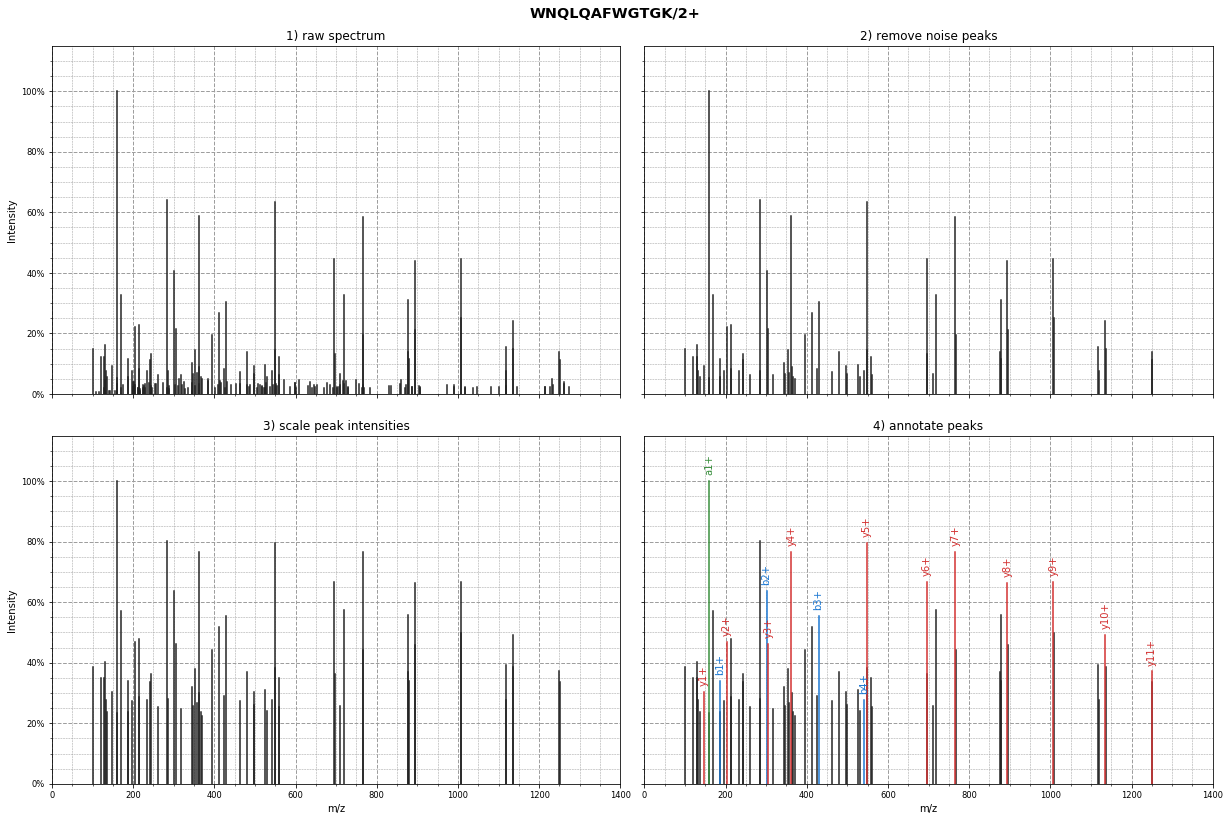

In [5]:
fig, axes = plt.subplots(2, 2, True, True, figsize=(18, 12))

# Panel 1: Raw spectrum.
spec = spec.set_mz_range(min_mz, max_mz)

plot.spectrum(spec, ax=axes[0, 0])

axes[0, 0].set_title('1) raw spectrum')
axes[0, 0].xaxis.label.set_visible(False)

# Panel 2: Remove noise peaks.
spec = (spec.remove_precursor_peak(fragment_tol_mass, fragment_tol_mode)
        .filter_intensity(min_intensity, max_num_peaks))

plot.spectrum(spec, ax=axes[0, 1])

axes[0, 1].set_title('2) remove noise peaks')

axes[0, 1].xaxis.label.set_visible(False)
axes[0, 1].yaxis.label.set_visible(False)

# Panel 3: Scale peak intensities.
spec = spec.scale_intensity(scaling)

plot.spectrum(spec, ax=axes[1, 0])

axes[1, 0].set_title('3) scale peak intensities')

# Panel 4: Annotation fragment peaks.
spec = spec.annotate_peaks(fragment_tol_mass, fragment_tol_mode, ion_types)

plot.spectrum(spec, ax=axes[1, 1])

axes[1, 1].set_title('4) annotate peaks')

axes[1, 1].yaxis.label.set_visible(False)

fig.suptitle(f'{spec.peptide}/{spec.precursor_charge}',
             y=.98, size='x-large', weight='bold')

plt.tight_layout(pad=4, w_pad=1, h_pad=2)

plt.show()
plt.close()